# Final Project, Progress Report - Jake Sinclair
This dataset represents all the fights from all UFC events from March 21st, 2010 to the most recent UFC event. Each row is a unique UFC fight while each column is a different variable related to the fight. This dataset will be interesting to work with because UFC is a growing sport, and is quickly becoming one of the most bet on as well. This sport is also multifaceted, with different genders, weight classes, ages, and MMA backgrounds competing. While this makes predictions harder, succesful modeling can help provide insight into what makes a UFC fight special, as well as important information to fans and sportsbetters alike.

## Research Questions
- 1.) What are trends surrounding the various weight classes in the UFC, are these biases between men and women and how has this changed over time?
- 2.) What defines a top level UFC fighter?
- 3.) How can we predict the winner of a UFC fight? Is it just due to the number of significant strikes a fighter lands, is it their wrestling ability, or are betting odds a better teller? 


## Report on Current State of Data Analysis
At the current moment, I am still working on some wrangling of data, as well as exploratory data analysis to be able to affectively use statistical modeling. Specifically, because this UFC dataset contains a lot of columns that are present for both the blue corner fighter and red corner fighter for each fight, a lot more comparison of groups is needed than I previously anticipated. Pertaining to data wrangling, there are some issues with spacing and inconsistencies in values for rows that I need to fix to get completely tidy data. For exploratory data analysis, a lot of the work that I have done is comparing distributions of different variables in the dataset, with a couple of scatterplots comparing fighter statistic and fighter height/weight. There is also more work to be done for EDA. More thought should be put into what makes this dataset special, and how I can unvail this through thoughtful use of visualization, wrangling, and summary statistics. Finally, pertaining to modeling, I have constructed a decision tree classifier as well as a random forest classifier. Using the features with highest importance from the decision tree, I was able to acheive a 65% R-squared score in accounting for the variance in the "Winner" variable indicating if the red or blue corner won the fight. Despite this, I am suspicious at the result and feel that it may be due to under/overfitting. While a 65% accuracy on predicting the winner of a UFC fight definitely beats the house edge, more work must be done to ensure this is significant and valid.

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import altair as alt

alt.data_transformers.enable("vegafusion")

# For standardization
from sklearn.preprocessing import StandardScaler
# MLP Regressor
from sklearn.neural_network import MLPRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay,  mean_squared_error
import matplotlib.pyplot as plt

In [2]:
ufc = pd.read_csv("ufc-master.csv")

In [3]:
ufc

RedFighter         BlueFighter  RedOdds  BlueOdds   
0             Neil Magny       Carlos Prates    550.0    -800.0  \
1     Gerald Meerschaert   Reinier de Ridder    250.0    -310.0   
2         Gaston Bolanos  Cortavious Romious    205.0    -250.0   
3         Luana Pinheiro   Gillian Robertson    360.0    -470.0   
4     Mansur Abdul-Malik     Dusko Todorovic   -485.0     370.0   
...                  ...                 ...      ...       ...   
6484        Duane Ludwig       Darren Elkins   -155.0     135.0   
6485         John Howard      Daniel Roberts   -210.0     175.0   
6486      Brendan Schaub       Chase Gormley   -260.0     220.0   
6487         Mike Pierce       Julio Paulino   -420.0     335.0   
6488        Eric Schafer         Jason Brilz    140.0    -160.0   

      RedExpectedValue  BlueExpectedValue        Date   
0             550.0000            12.5000  2024-11-09  \
1             250.0000            32.2581  2024-11-09   
2             205.0000            40.0000  2024-11-09   
3             360.0000            21.2766  2024-11-09   
4              20.6186           370.0000  2024-11-09   
...                ...                ...         ...   
6484           64.5161           135.0000  2010-03-21   
6485           47.6190           175.0000  2010-03-21   
6486           38.4615           220.0000  2010-03-21   
6487           23.8095           335.0000  2010-03-21   
6488          140.0000            62.5000  2010-03-21   

                       Location Country Winner  ...  FinishDetails   
0        Las Vegas, Nevada, USA     USA   Blue  ...          Punch  \
1        Las Vegas, Nevada, USA     USA   Blue  ...   Arm Triangle   
2        Las Vegas, Nevada, USA     USA    Red  ...            NaN   
3        Las Vegas, Nevada, USA     USA   Blue  ...            NaN   
4        Las Vegas, Nevada, USA     USA    Red  ...        Punches   
...                         ...     ...    ...  ...            ...   
6484  Broomfield, Colorado, USA     USA   Blue  ...            NaN   
6485  Broomfield, Colorado, USA     USA    Red  ...          Punch   
6486  Broomfield, Colorado, USA     USA    Red  ...        Punches   
6487  Broomfield, Colorado, USA     USA    Red  ...            NaN   
6488  Broomfield, Colorado, USA     USA   Blue  ...            NaN   

     FinishRound FinishRoundTime  TotalFightTimeSecs  RedDecOdds  BlueDecOdds   
0            1.0            4:50               290.0      1100.0        800.0  \
1            3.0            1:44               704.0       700.0        200.0   
2            3.0            5:00               900.0       550.0        275.0   
3            3.0            5:00               900.0       600.0        250.0   
4            1.0            2:44               164.0       600.0          NaN   
...          ...             ...                 ...         ...          ...   
6484         1.0            0:44                44.0         NaN          NaN   
6485         1.0            2:01               121.0         NaN          NaN   
6486         1.0            0:47                47.0         NaN          NaN   
6487         3.0            5:00               900.0         NaN          NaN   
6488         3.0            5:00               900.0         NaN          NaN   

      RSubOdds  BSubOdds  RKOOdds  BKOOdds  
0       1600.0     800.0   2000.0   -400.0  
1        600.0     165.0   1400.0    450.0  
2       3000.0     165.0    380.0    450.0  
3       2200.0     110.0    900.0    500.0  
4        800.0       NaN   -250.0      NaN  
...        ...       ...      ...      ...  
6484       NaN       NaN      NaN      NaN  
6485       NaN       NaN      NaN      NaN  
6486       NaN       NaN      NaN      NaN  
6487       NaN       NaN      NaN      NaN  
6488       NaN       NaN      NaN      NaN  

[6489 rows x 118 columns]

## Data Wrangling

In [4]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB


In [5]:
ufc.columns

Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs',
       'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds',
       'BKOOdds'],
      dtype='object', length=118)

In [6]:
for column in ufc.columns:
    print(f"{column}: {ufc[column].dtype}")

RedFighter: object
BlueFighter: object
RedOdds: float64
BlueOdds: float64
RedExpectedValue: float64
BlueExpectedValue: float64
Date: object
Location: object
Country: object
Winner: object
TitleBout: bool
WeightClass: object
Gender: object
NumberOfRounds: int64
BlueCurrentLoseStreak: int64
BlueCurrentWinStreak: int64
BlueDraws: int64
BlueAvgSigStrLanded: float64
BlueAvgSigStrPct: float64
BlueAvgSubAtt: float64
BlueAvgTDLanded: float64
BlueAvgTDPct: float64
BlueLongestWinStreak: int64
BlueLosses: int64
BlueTotalRoundsFought: int64
BlueTotalTitleBouts: int64
BlueWinsByDecisionMajority: int64
BlueWinsByDecisionSplit: int64
BlueWinsByDecisionUnanimous: int64
BlueWinsByKO: int64
BlueWinsBySubmission: int64
BlueWinsByTKODoctorStoppage: int64
BlueWins: int64
BlueStance: object
BlueHeightCms: float64
BlueReachCms: float64
BlueWeightLbs: int64
RedCurrentLoseStreak: int64
RedCurrentWinStreak: int64
RedDraws: int64
RedAvgSigStrLanded: float64
RedAvgSigStrPct: float64
RedAvgSubAtt: float64
RedAvgTD

In [7]:
ufc.WeightClass

0              Welterweight
1              Middleweight
2              Bantamweight
3       Women's Strawweight
4              Middleweight
               ...         
6484            Lightweight
6485           Welterweight
6486            Heavyweight
6487           Welterweight
6488      Light Heavyweight
Name: WeightClass, Length: 6489, dtype: object

In [8]:
ufc = ufc[ufc["WeightClass"] != "Catch Weight"] # fights where fighters agree to fight at a weight between their two weight classes

In [9]:
year = []
for i in ufc["Date"]:
    year.append(i[:4])
    #print(i[:4])
    
ufc = ufc.assign(Year = year)

In [10]:
# converting date string into a date-time object that can be used with numbers
ufc['Date'] = pd.to_datetime(ufc['Date'])

print(ufc.info()) 
print(ufc['Date'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 6430 entries, 0 to 6488
Columns: 119 entries, RedFighter to Year
dtypes: bool(1), datetime64[ns](1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB
None
0   2024-11-09
1   2024-11-09
2   2024-11-09
3   2024-11-09
4   2024-11-09
Name: Date, dtype: datetime64[ns]


In [11]:
# Country column has duplicates because of white space issues
# striping the white space to resolve that issue
ufc['Country'] = ufc['Country'].str.strip()

## Exploratory Data Analysis

### Bar Chart of Weight Class Distribution

In [12]:
alt.data_transformers.enable("vegafusion")

viz = alt.Chart(ufc, title="Distribution of Fight Weight Classes").mark_bar().encode(
    x=alt.X("WeightClass:N", title="Weight Class of Fight", axis=alt.Axis(labelAngle=60)),
    y=alt.Y('count()', title='Number of Fights'),
    color=alt.Color("WeightClass:N", legend=None) 
).configure_axis(
    labelFontSize=12,  # Adjust axis label font size
    titleFontSize=14   # Adjust axis title font size
)

viz


alt.Chart(...)

In this bar chart we can see the distribution of UFC fights across weight classes. The classes with the highest number of fights in order are: lightweight (1,170), middleweight (790), and welterweight (1,010). Contrasting with this, the women weight classes have 3 out of the 4 classes with tht lowest number of fights, with women's bantamweight around 200 fights, women's featherweight ~ 30 fights, women's flyweight ~ 220 fights, and women's strawweight ~ 310 fights. It seems to be that there is a clear disproportionate number of fights for men in the UFC, though it is possible that these numbers have increase over time.
<br>

Going forward, we should add a line chart that tracks the trend of # of women fighters per each year.

### Bar Plot of Gender Distribution in UFC Fights

In [13]:
viz = alt.Chart(ufc, title="Gender Distribution of UFC Fights").mark_bar().encode(
    x=alt.X("Gender:N", title="Gender"),
    y='count()',
    color=alt.Color("Gender")

).configure_axis(
    labelFontSize=12,  # Adjust axis label font size
    titleFontSize=14   # Adjust axis title font size
)

viz

alt.Chart(...)

As we have seen in the previous distribution of weight classes, there is a clear gender imbalance favoring male fights in the UFC. While this may be due to trends over time, social standards surrounding gender roles, a lack of women in the sport, or negligence of UFC officials, we must do more work to understand this gap better.

In [14]:
years = ufc["Year"].unique()
women_counts = []

for i in years:
    num_women = len(ufc[(ufc.Gender == "FEMALE") & (ufc.Year == i)])
    women_counts.append(num_women)
    
women_dist = pd.DataFrame({
    "years": years,
    "women_counts": women_counts
})
 
women_viz = alt.Chart(women_dist, title="Gender Distribution of UFC Fighters Per Year").mark_line().encode(
    x=alt.X("years:O", title="Year"),
    y=alt.Y("women_counts:Q", title="Number of Women Fighters"),

).interactive()

In [15]:

men_counts = []

for i in years:
    num_men = len(ufc[(ufc.Gender == "MALE") & (ufc.Year == i)])
    men_counts.append(num_men)

men_dist = pd.DataFrame({
    "years": years,
    "men_counts": men_counts
})
 
men_viz = alt.Chart(men_dist, title="Gender Distribution of UFC Fighters Per Year").mark_line(color="orange").encode(
    x=alt.X("years:O", title="Year"),
    y=alt.Y("men_counts:Q", title="Number of Men Fighters"),

).interactive()

In [16]:
women_viz + men_viz

alt.LayerChart(...)

### Bar Chart of Fight Country Location Distributions

In [17]:
ufc.Country.unique()

array(['USA', 'Canada', 'United Arab Emirates', 'France', 'Australia',
       'United Kingdom', 'Saudi Arabia', 'Brazil', 'Mexico', 'Singapore',
       'New Zealand', 'South Korea', 'Russia', 'Denmark', 'China',
       'Uruguay', 'Sweden', 'Czech Republic', 'Argentina', 'Germany',
       'Chile', 'Poland', 'Japan', 'Netherlands', 'Croatia', 'Ireland',
       'Philippines'], dtype=object)

In [18]:
# # Prepare the world map
# from geopy.geocoders import Nominatim
# from vega_datasets import data
# # Initialize geolocator
# geolocator = Nominatim(user_agent="ufc_geocoder")

# # Function to get latitude and longitude
# def geocode_location(location):
#     try:
#         loc = geolocator.geocode(location)
#         return loc.latitude, loc.longitude
#     except:
#         return None, None

# # Sample data and apply geocoding
# sampled_ufc = ufc.sample(n=100, random_state=42)  # Adjust n based on your dataset size
# sampled_ufc[['Latitude', 'Longitude']] = sampled_ufc['Location'].apply(geocode_location).apply(pd.Series)

# # Filter out rows with missing geocodes
# sampled_ufc = sampled_ufc.dropna(subset=['Latitude', 'Longitude'])

# # Prepare the world map
# source = alt.topo_feature(data.world_110m.url, 'countries')

# input_dropdown = alt.binding_select(options=[
#     "albers", "albersUsa", "azimuthalEqualArea", "azimuthalEquidistant",
#     "conicEqualArea", "conicEquidistant", "equalEarth", "equirectangular",
#     "gnomonic", "mercator", "naturalEarth1", "orthographic", "stereographic",
#     "transverseMercator"
# ], name='Projection ')
# param_projection = alt.param(value="equalEarth", bind=input_dropdown)

# world_map = alt.Chart(source).mark_geoshape(
#     fill='lightgray',
#     stroke='gray'
# ).project(
#     type=alt.expr(param_projection.name)
# ).add_params(param_projection)

# # Add fight points
# fight_points = alt.Chart(sampled_ufc).mark_circle(size=100, color='red').encode(
#     longitude='Longitude:Q',
#     latitude='Latitude:Q',
#     color=alt.Color("Country:N"),
#     tooltip=['Country:N', 'Location:N']
# )

# # Combine map and fight points
# final_chart = (world_map + fight_points).properties(width=800, height=500)

# final_chart

In [19]:
viz = alt.Chart(ufc, title="Country of UFC Event").mark_bar().encode(
    x=alt.X("Country:N", title="Country"),
    y='count()',
    color=alt.Color('Country', legend=None)
).configure_axis(
    labelFontSize=12,  # Adjust axis label font size
    titleFontSize=14   # Adjust axis title font size
)

viz

alt.Chart(...)

In looking at the distribution of fights in the UFC, we can see that they primarily take place in the USA. While the UFC is owned as a company in the US, many of its fighters come from all over the world, with many coming from Brazil, Russia, United Kingdom, Australia, Nigeria, and more. To grow popularity throughout more countries we would urge the UFC to do more events in the home countries of its athletes.

### Examining the Winningest Fighters

In [20]:
top_red_winners = ufc.nlargest(10, 'RedWins')[['RedFighter', 'RedWins', 'RedStance']]
top_red_winners.rename(columns = {'RedFighter': 'Fighter', 'RedWins': 'Wins', 'RedStance': 'Stance'}, inplace=True)

top_blue_winners = ufc.nlargest(10, 'BlueWins')[['BlueFighter', 'BlueWins', 'BlueStance']]
top_blue_winners.rename(columns = {'BlueFighter': 'Fighter', 'BlueWins': 'Wins', 'BlueStance': 'Stance'}, inplace=True)

In [21]:
winningest_fighters = pd.merge(top_blue_winners, top_red_winners, how='outer')
winningest_fighters = (
    winningest_fighters.loc[winningest_fighters.groupby('Fighter')['Wins'].idxmax()]
)

winningest_fighters.sort_values('Wins', ascending=False)

Fighter  Wins    Stance
12  Alistair Overeem    33  Orthodox
0     Anderson Silva    31  Southpaw
1     Donald Cerrone    29  Orthodox
15      Mauricio Rua    27  Orthodox
5         Jim Miller    26  Southpaw
19   Andrei Arlovski    25  Orthodox
6     Dustin Poirier    23  Southpaw
10   Fabricio Werdum    22  Orthodox
9       Max Holloway    22  Orthodox

In merging the DataFrames of the winningest fighters of all time we have found that these names include Alistair Overeem, Anderson Silva, Donald Cerrone, Mauricio Rua, Jim Miller, and more. While these fighters are undoubtably impressive with a long career, it is possible that their high number of wins could be due to a high number of fights competed in, and not necessarily one of the highest win percentages. To find who the bonafide "BEST" fighters of all time (likely the Jon Jones, Islam Makhachev, and Islam Nurmagomedov's of the world), we should look closer at who has the highest win streaks, and the who has the highest win percentage ((wins/wins + losses) * 100). We can also see who is the best in the last year, 5 years, 10 years, etc.

In [22]:
ufc_last_five_years = ufc[ufc["Date"] >  '2019-11-02']
ufc_last_five_years

RedFighter         BlueFighter  RedOdds  BlueOdds   
0                Neil Magny       Carlos Prates    550.0    -800.0  \
1        Gerald Meerschaert   Reinier de Ridder    250.0    -310.0   
2            Gaston Bolanos  Cortavious Romious    205.0    -250.0   
3            Luana Pinheiro   Gillian Robertson    360.0    -470.0   
4        Mansur Abdul-Malik     Dusko Todorovic   -485.0     370.0   
...                     ...                 ...      ...       ...   
2471          Roman Kopylov       Karl Roberson   -145.0     125.0   
2472  Abubakar Nurmagomedov        David Zawada   -265.0     225.0   
2473     Alexander Yakovlev   Roosevelt Roberts    110.0    -130.0   
2474     Jessica-Rose Clark      Pannie Kianzad   -105.0    -115.0   
2475         Grigorii Popov         Davey Grant   -150.0     130.0   

      RedExpectedValue  BlueExpectedValue       Date                Location   
0             550.0000            12.5000 2024-11-09  Las Vegas, Nevada, USA  \
1             250.0000            32.2581 2024-11-09  Las Vegas, Nevada, USA   
2             205.0000            40.0000 2024-11-09  Las Vegas, Nevada, USA   
3             360.0000            21.2766 2024-11-09  Las Vegas, Nevada, USA   
4              20.6186           370.0000 2024-11-09  Las Vegas, Nevada, USA   
...                ...                ...        ...                     ...   
2471           68.9655           125.0000 2019-11-09  Moscow, Moscow, Russia   
2472           37.7358           225.0000 2019-11-09  Moscow, Moscow, Russia   
2473          110.0000            76.9231 2019-11-09  Moscow, Moscow, Russia   
2474           95.2381            86.9565 2019-11-09  Moscow, Moscow, Russia   
2475           66.6667           130.0000 2019-11-09  Moscow, Moscow, Russia   

     Country Winner  ...  FinishRound FinishRoundTime TotalFightTimeSecs   
0        USA   Blue  ...          1.0            4:50              290.0  \
1        USA   Blue  ...          3.0            1:44              704.0   
2        USA    Red  ...          3.0            5:00              900.0   
3        USA   Blue  ...          3.0            5:00              900.0   
4        USA    Red  ...          1.0            2:44              164.0   
...      ...    ...  ...          ...             ...                ...   
2471  Russia   Blue  ...          3.0            4:01              841.0   
2472  Russia   Blue  ...          1.0            2:50              170.0   
2473  Russia   Blue  ...          3.0            5:00              900.0   
2474  Russia   Blue  ...          3.0            5:00              900.0   
2475  Russia   Blue  ...          NaN             NaN                NaN   

      RedDecOdds  BlueDecOdds  RSubOdds  BSubOdds  RKOOdds  BKOOdds  Year  
0         1100.0        800.0    1600.0     800.0   2000.0   -400.0  2024  
1          700.0        200.0     600.0     165.0   1400.0    450.0  2024  
2          550.0        275.0    3000.0     165.0    380.0    450.0  2024  
3          600.0        250.0    2200.0     110.0    900.0    500.0  2024  
4          600.0          NaN     800.0       NaN   -250.0      NaN  2024  
...          ...          ...       ...       ...      ...      ...   ...  
2471       310.0        295.0     500.0     875.0    300.0    404.0  2019  
2472      -135.0        515.0     625.0     665.0    780.0   1000.0  2019  
2473       170.0        360.0     900.0    1400.0   1565.0    600.0  2019  
2474       135.0        130.0    1120.0    1400.0   1300.0   1230.0  2019  
2475       185.0        275.0     587.0     535.0    350.0   1200.0  2019  

[2434 rows x 119 columns]

### Regression Plot of the Relationship of Red and Blue Fighter Significant Strikes

In [23]:
sampled_ufc = ufc.sample(n=1000, random_state=42)  # Adjust n to control the subset size
scatter = alt.Chart(sampled_ufc, title="Relationship between Blue Fighter and Red Fighter Significant Strikes").mark_point().encode(
    x=alt.X("RedAvgSigStrLanded:Q", title="Red Sig Strikes Landed Per 15 Minutes"),
    y=alt.Y("BlueAvgSigStrLanded:Q", title="Blue Sig Strikes Landed Per 15 Minutes"),
    color=alt.Color("WeightClass:N"), # colored by weight class
    tooltip=["RedFighter", "RedAvgSigStrLanded", "BlueFighter", "BlueAvgSigStrLanded", "Winner"],
    detail="RedFighter"  # Treat each row as unique
)

scatter + scatter.transform_regression("RedAvgSigStrLanded", "BlueAvgSigStrLanded").mark_line(color="red")

alt.LayerChart(...)

Significant Strikes are important in UFC fights. They are defined as "any Distance Strike or Clinch/Ground Strikes that are considered "Power Strikes" by official scorers. A Significant Strike will count as both a strike and a significant strike and will be worth a total of 0.4 Pts." as according to UFC definition.

### Scatterplot of UFC Heights and Weights

In [24]:
viz1 = alt.Chart(ufc, title="Scatterplot of Height and Weight of Red Corner Fighters").mark_point().encode(
    x=alt.X("RedHeightCms:Q").scale(zero=False),
    y=alt.Y("RedWeightLbs:Q").scale(zero=False),
    color=alt.Color("WeightClass:N"),
    tooltip=["RedFighter", "RedHeightCms", "RedWeightLbs", "WeightClass"]
)
viz2 = alt.Chart(ufc, title="Scatterplot of Height and Weight of Blue Corner Fighters").mark_point().encode(
    x=alt.X("BlueHeightCms:Q").scale(zero=False),
    y=alt.Y("BlueWeightLbs:Q").scale(zero=False),
    color=alt.Color("WeightClass:N"),
    tooltip=["BlueFighter", "BlueHeightCms", "BlueWeightLbs", "WeightClass"]
)

viz1 | viz2

alt.HConcatChart(...)

Comparing the two plots we can see that there is a general positive correlation of height and weight. We can also see that this correlation is split by clusters of groups (each of these pertaining to weight classes). It may be interesting to take this a step further and examine what clusters exist in the dataset and if they match up to the weight classes that exist.

## Predictive Modeling

As stated in the introduction the results of predictive modeling with UFC data can be big. As a growing sport that has lots of betters, it is important to take proper steps and care with the data, as so to obtain an accurate and valid model.

### Decision Tree Classifier
Because the main outcome of a UFC fight, and likely what is most bet on, I will focus on "Winner" as a target variable. In this case "Winner" is a categorical variable and will require classification for our predictive modeling. I have picked a decision tree and the random forest, as to find the most important features (predictor variables) to predict which corner wins "Blue" or "Red".

In [25]:
print(ufc.columns.tolist())

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

The only columns I haven't included in the predictors are the Date, Location, and Country as there are too many individual classes for them and they seem to hold a lack of importance to who wins the fight.

### Creating Decision Tree

In [26]:
predictors=['RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'BlueCurrentLoseStreak', 
            'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 
            'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 
            'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 
            'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 
            'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 
            'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 
            'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 
            'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 
            'RedStance', 'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 
            'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'LoseStreakDif', 
            'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 
            'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 
            'AvgSubAttDif', 'AvgTDDif', 'EmptyArena', 'BMatchWCRank', 'RMatchWCRank', 'RWFlyweightRank', 'RWFeatherweightRank',
            'RWStrawweightRank', 'RWBantamweightRank', 'RHeavyweightRank', 'RLightHeavyweightRank', 'RMiddleweightRank', 
            'RWelterweightRank', 'RLightweightRank', 'RFeatherweightRank', 'RBantamweightRank', 'RFlyweightRank', 'RPFPRank', 
            'BWFlyweightRank', 'BWFeatherweightRank', 'BWStrawweightRank', 'BWBantamweightRank', 'BHeavyweightRank', 
            'BLightHeavyweightRank', 'BMiddleweightRank', 'BWelterweightRank', 'BLightweightRank', 'BFeatherweightRank', 
            'BBantamweightRank', 'BFlyweightRank', 'BPFPRank', 'BetterRank', 'Finish', 'FinishRound',
            'TotalFightTimeSecs', 'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds']

target = "Winner"

# get reference coding for categorical variables (use get dummies)
X = pd.get_dummies(ufc[predictors])
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    test_size=0.2, # percentage of the data for test size
    random_state=0) # random "seed", keeping the seed consistent rather than randomizing every time (0 or 42 is common)

tree = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=1, random_state=42, criterion="entropy")
tree.fit(X_train, y_train)

feature_names = tree.feature_names_in_
categories = tree.classes_

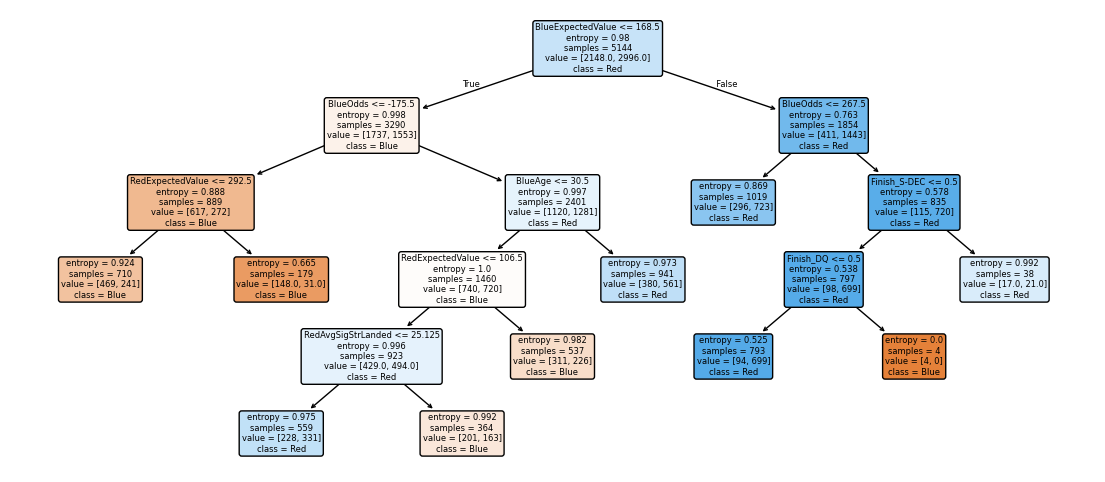

In [27]:
plt.figure(figsize=(14, 6))
plot_tree(tree, filled=True, rounded=True, feature_names=feature_names, class_names=categories, fontsize=6)
plt.show()

In looking at the decision tree, it seems that some of the most important variables are blue odd and blue expected value. This is because both of these variables split nodes high up in the tree and/or are repeated throughout the tree. This will be important to include in our predictor variables along with others.

In [28]:
new_predictors = []
for feature, importance in zip(feature_names, tree.feature_importances_):
    print(feature, importance)
    if importance > 0.03:
        new_predictors.append(feature)
print(new_predictors)

RedOdds 0.0
BlueOdds 0.25230610353704697
RedExpectedValue 0.04744845228506252
BlueExpectedValue 0.5969572646658365
BlueCurrentLoseStreak 0.0
BlueCurrentWinStreak 0.0
BlueDraws 0.0
BlueAvgSigStrLanded 0.0
BlueAvgSigStrPct 0.0
BlueAvgSubAtt 0.0
BlueAvgTDLanded 0.0
BlueAvgTDPct 0.0
BlueLongestWinStreak 0.0
BlueLosses 0.0
BlueTotalRoundsFought 0.0
BlueTotalTitleBouts 0.0
BlueWinsByDecisionMajority 0.0
BlueWinsByDecisionSplit 0.0
BlueWinsByDecisionUnanimous 0.0
BlueWinsByKO 0.0
BlueWinsBySubmission 0.0
BlueWinsByTKODoctorStoppage 0.0
BlueWins 0.0
BlueHeightCms 0.0
BlueReachCms 0.0
BlueWeightLbs 0.0
RedCurrentLoseStreak 0.0
RedCurrentWinStreak 0.0
RedDraws 0.0
RedAvgSigStrLanded 0.023059819959350327
RedAvgSigStrPct 0.0
RedAvgSubAtt 0.0
RedAvgTDLanded 0.0
RedAvgTDPct 0.0
RedLongestWinStreak 0.0
RedLosses 0.0
RedTotalRoundsFought 0.0
RedTotalTitleBouts 0.0
RedWinsByDecisionMajority 0.0
RedWinsByDecisionSplit 0.0
RedWinsByDecisionUnanimous 0.0
RedWinsByKO 0.0
RedWinsBySubmission 0.0
RedWinsByTK

In looking at the feature importances, we can see that the only ones over 0.1 are BlueOdds and BlueExpected value. This could either be that blue corner wins are easier to predict, or that the data is falling to the rare class problem and will predict mostly blue winners. To confirm this more EDA can be done to compare the distibution of winners between blue corner and red corner.

In [29]:
predictors = new_predictors

target = "Winner"

# get reference coding for categorical variables (use get dummies)
# penguins = penguins.dropna(subset = predictors + [target])
X = pd.get_dummies(ufc[predictors])
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    test_size=0.2, # percentage of the data for test size
    random_state=0) # random "seed", keeping the seed consistent rather than randomizing every time (0 or 42 is common)

random_forest = RandomForestClassifier(max_leaf_nodes=10, min_samples_leaf=1, random_state=42, criterion="entropy")
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=42)

In [30]:
for feature, importance in zip(predictors, random_forest.feature_importances_):
    print(feature, importance)

BlueOdds 0.3435638892098455
RedExpectedValue 0.32226355221888753
BlueExpectedValue 0.30160560894445265
BlueAge 0.03256694962681422


We can see that BlueOdds has just a slightly higher importance than BlueExpectedValue.

In [31]:
predictions = random_forest.predict(X_test)

# Predicted Probabilities
probabilities = random_forest.predict_proba(X_test)

# Categories
categories = random_forest.classes_

# DataFrame of Probabilities
probabilities = pd.DataFrame(probabilities, columns=categories)
probabilities

Blue       Red
0     0.447011  0.552989
1     0.275805  0.724195
2     0.690456  0.309544
3     0.154110  0.845890
4     0.617931  0.382069
...        ...       ...
1281  0.669672  0.330328
1282  0.279845  0.720155
1283  0.315279  0.684721
1284  0.166419  0.833581
1285  0.647435  0.352565

[1286 rows x 2 columns]

In [32]:
# Calculate confusion matrix and transform data
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat,index=categories,columns=categories)
conf_mat = conf_mat.melt(ignore_index=False).reset_index()
# Create heatmap
heatmap = alt.Chart(conf_mat).mark_rect().encode(
    x=alt.X("variable:N").title("Predicted Response"),
    y=alt.Y("index:N").title("True Response"),
    color=alt.Color("value:Q", legend=None).scale(scheme="blues")
).properties(
    width=400,
    height=400
)
# Add text labels for numbers
text = heatmap.mark_text(baseline="middle").encode(
    text=alt.Text("value:Q"),
    color=alt.value("black"),
    size=alt.value(50)
)

heatmap + text

alt.LayerChart(...)

It does seem that our data is falling victim to the rare class problem, where the positive category "Red" is being predicted much more often. This may indicate that we have a lack of validity in our model.

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Blue       0.63      0.44      0.52       552
         Red       0.66      0.81      0.72       734

    accuracy                           0.65      1286
   macro avg       0.64      0.62      0.62      1286
weighted avg       0.64      0.65      0.63      1286



In looking at the classification report, we can see that the model performed much stronger in predicting the red class than the blue class. This may be due to the distribution of winners across UFC events, but the blue class had poor performance nonetheless. Pertaining to precision (blue = 0.67, red = 0.66) the blue category had slighly higher performance. For recall (blue = 0.42, red = 0.82) the red category performed twice as well. Finally for specificity (blue = 0.52, red = 0.74) the red class was outperformed again.

In [34]:
scores = cross_val_score(random_forest, X, y, cv=5)
print(f"{scores.mean():.2} R-squared with standard deviation {scores.std():.2}")

0.66 R-squared with standard deviation 0.015


In looking at cross-validation and re-running our model with a different split of test and train data we have acheived an r-squared score of 0.66 with a std of 0.014. This indicates that on avg our model accounted for 66% of the variation in who wins a UFC fight. While if valid, this would be a significant amount of variance to account for, we still have some fine tuning of the model to do to ensure validity and top accuracy.

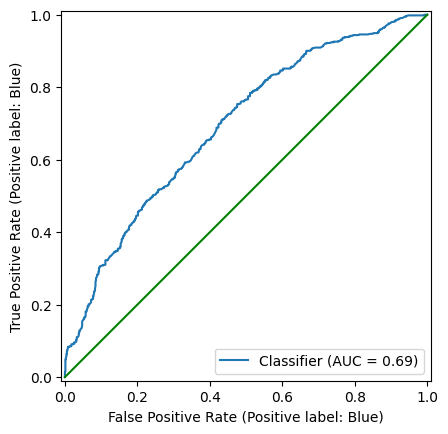

In [35]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test,
                                 probabilities[categories[0]],
                                 pos_label=categories[0])

# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'g')

In looking at our ROC and the area under the curve, we can see that 71% of the data falls under the curve. This is a decent majority of the data and indicates that our model performed okay in classification.

## Regression Model

In [36]:
predictors = ['RedOdds', 'BlueOdds', 'RedExpectedValue', 
              'BlueExpectedValue', 'Winner', 'TitleBout', 'Gender', 'BlueCurrentLoseStreak', 
              'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 
              'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 
              'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 
              'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 
              'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 
              'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 
              'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 
              'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 
              'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 
              'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 
              'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 
              'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 
              'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 
              'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 
              'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif',
              'AvgSubAttDif', 'AvgTDDif', 'EmptyArena', 'BMatchWCRank', 'RMatchWCRank', 
              'RWFlyweightRank', 'RWFeatherweightRank', 'RWStrawweightRank', 'RWBantamweightRank', 
              'RHeavyweightRank', 'RLightHeavyweightRank', 'RMiddleweightRank', 'RWelterweightRank', 
              'RLightweightRank', 'RFeatherweightRank', 'RBantamweightRank', 'RFlyweightRank', 
              'RPFPRank', 'BWFlyweightRank', 'BWFeatherweightRank', 'BWStrawweightRank', 
              'BWBantamweightRank', 'BHeavyweightRank', 'BLightHeavyweightRank', 'BMiddleweightRank', 
              'BWelterweightRank', 'BLightweightRank', 'BFeatherweightRank', 'BBantamweightRank', 
              'BFlyweightRank', 'BPFPRank', 'BetterRank', 'Finish',
              'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds', 
              'BKOOdds',]

target = "NumberOfRounds"

# get reference coding for categorical variables (use get dummies)
# ufc = ufc.dropna(subset = predictors + [target])
X = pd.get_dummies(ufc[predictors])
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    test_size=0.3, # percentage of the data for test size
    random_state=0) # random "seed", keeping the seed consistent rather than randomizing every time (0 or 42 is common)

regressor_tree = DecisionTreeRegressor(max_leaf_nodes=10, min_samples_leaf=1, random_state=42, criterion="squared_error")
regressor_tree.fit(X_train, y_train)

feature_names = regressor_tree.feature_names_in_

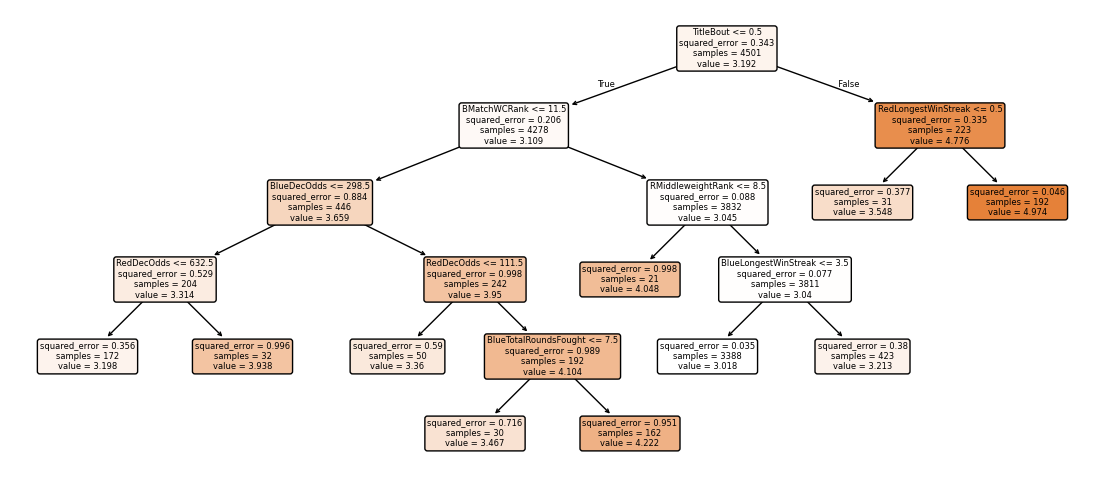

In [37]:
plt.figure(figsize=(14, 6))
plot_tree(regressor_tree, filled=True, rounded=True, feature_names=feature_names, fontsize=6)
plt.show()

In [38]:
new_predictors = []
for feature, importance in zip(feature_names, regressor_tree.feature_importances_):
    print(feature, importance)
    if importance > 0:
        new_predictors.append(feature)
print(new_predictors)

RedOdds 0.0
BlueOdds 0.0
RedExpectedValue 0.0
BlueExpectedValue 0.0
TitleBout 0.636360832149648
BlueCurrentLoseStreak 0.0
BlueCurrentWinStreak 0.0
BlueDraws 0.0
BlueAvgSigStrLanded 0.0
BlueAvgSigStrPct 0.0
BlueAvgSubAtt 0.0
BlueAvgTDLanded 0.0
BlueAvgTDPct 0.0
BlueLongestWinStreak 0.015418519042347548
BlueLosses 0.0
BlueTotalRoundsFought 0.015619267010190178
BlueTotalTitleBouts 0.0
BlueWinsByDecisionMajority 0.0
BlueWinsByDecisionSplit 0.0
BlueWinsByDecisionUnanimous 0.0
BlueWinsByKO 0.0
BlueWinsBySubmission 0.0
BlueWinsByTKODoctorStoppage 0.0
BlueWins 0.0
BlueHeightCms 0.0
BlueReachCms 0.0
BlueWeightLbs 0.0
RedCurrentLoseStreak 0.0
RedCurrentWinStreak 0.0
RedDraws 0.0
RedAvgSigStrLanded 0.0
RedAvgSigStrPct 0.0
RedAvgSubAtt 0.0
RedAvgTDLanded 0.0
RedAvgTDPct 0.0
RedLongestWinStreak 0.05863119012927277
RedLosses 0.0
RedTotalRoundsFought 0.0
RedTotalTitleBouts 0.0
RedWinsByDecisionMajority 0.0
RedWinsByDecisionSplit 0.0
RedWinsByDecisionUnanimous 0.0
RedWinsByKO 0.0
RedWinsBySubmission 0

In [39]:
ufc.fillna('NULL', inplace=True)
X = pd.get_dummies(ufc[new_predictors]) # One-hot encoding for our predictors 
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.4, # choosing a test split of 0.4 
    random_state=0)

# Standardizing using the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

In [40]:
neural = MLPRegressor(hidden_layer_sizes=(5, 4,), 
                    max_iter = 1000,
                    activation='relu', 
                    solver='sgd', 
                    alpha=0.001, 
                    random_state=42, 
                    learning_rate='adaptive',
                    verbose=False)

neural.fit(X_train_std, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(5, 4), learning_rate='adaptive',
             max_iter=1000, random_state=42, solver='sgd')

In [41]:
# Our out-of-sample residuals:
# Standardize test data before predicting!
X_test_std = scaler.transform(X_test)
predictions = neural.predict(X_test_std)

residuals = y_test - predictions
residuals # shows us how far the observed result (data points) are from the predicted result (line)

# difference between the observed values and what the model predicted
# y-test = observed values, predictions = predicted values

1945   -0.150879
1116    0.108718
2938   -0.127441
740    -0.242242
2249   -0.314170
          ...   
4851   -0.135606
3659    0.054190
4478   -2.330782
783     0.066643
3425   -0.826254
Name: NumberOfRounds, Length: 2572, dtype: float64

In [42]:
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions)):.2f}")

Root mean squared error: 0.47


In [43]:
# First put the results into a dataframe
results = pd.DataFrame({'Predictions': predictions, 'Residuals':residuals})

# x-axis = residuals, y-axis is a count()
alt.Chart(results, title="Histogram of Residuals").mark_bar().encode(
    x=alt.X('Residuals:Q', title="Residuals").bin(maxbins=40),
    y=alt.Y('count():Q', title="Value Counts")
)

alt.Chart(...)

In [ ]:
scores = cross_val_score(neural, X, y, cv=5)
print(f"{scores.mean():.2} R-squared with standard deviation {scores.std():.2}")

## Something I Have Learned
In being a UFC fan myself, I didn't realize how significant the gender gap was in fight competition. In recent years I felt like the distribution was more even, but this may be due to my own biases. Over the course of time there have been disproportionate numbers of UFC fights for not only women, but in the locations that in event is held. For a sport that has so many diverse athletes and diverse fans from all over the world, it ought to do a better job in being equitable.

## Something I've Found Difficult/Confusing/Haven't Figured Out
I've found it particularly difficult that this UFC dataset contains a lot of columns that are present for both the blue corner fighter and red corner fighter for each fight, and have found it necessary to do a lot of comparison/aggregation of groups. Particularly when trying to figure out who the best fighters are, issues arise because at any point in a career, a fighter could have been in the blue or red corner.

## References

https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset?resource=download

https://www.ufc.com/